In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset from CSV
df = pd.read_csv('spam.csv', encoding='latin-1')

# Show the first 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [3]:
import urllib.request

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(url, "spam.tsv")



('spam.tsv', <http.client.HTTPMessage at 0x3031c5bd0>)

In [4]:
df = pd.read_csv('spam.tsv', sep='\t', header=None, names=['label', 'message'])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print("Dataset shape:", df.shape)
print("\nData types and info:")
print(df.info())


Dataset shape: (5572, 2)

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


label
ham     4825
spam     747
Name: count, dtype: int64


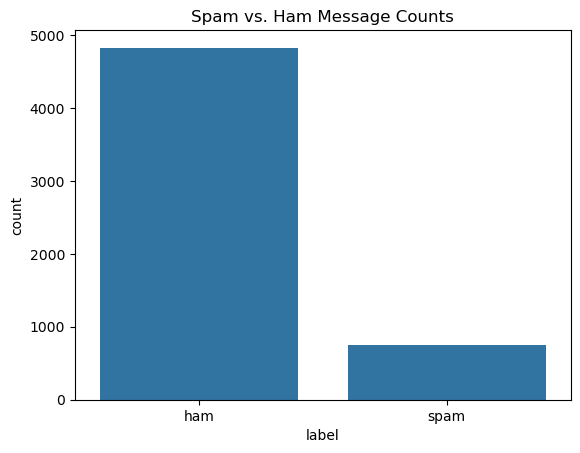

In [6]:
print(df['label'].value_counts())

# Optional: Visualize label distribution
sns.countplot(x='label', data=df)
plt.title("Spam vs. Ham Message Counts")
plt.show()


In [7]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
label      0
message    0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Separate features (text messages) and labels (spam/ham)
X = df['message']
y = df['label']

# Split data into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Learn vocabulary from training data and transform it into feature vectors
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform test data (do not fit again)
X_test_vectors = vectorizer.transform(X_test)

print("Number of features (words):", len(vectorizer.get_feature_names_out()))



Number of features (words): 7668


Model Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



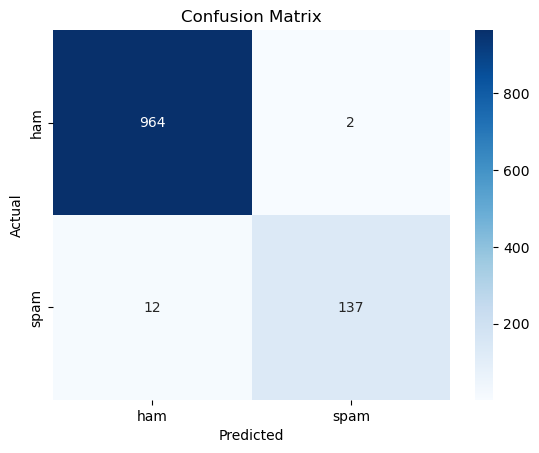

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model on the training vectors and labels
model.fit(X_train_vectors, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test_vectors)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
